In [502]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

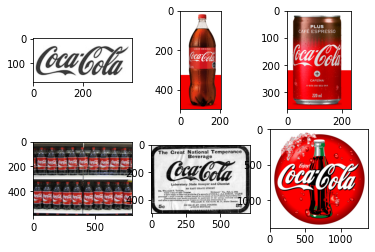

In [503]:
# Cargamos la imagen a procesar
img_1 = cv.imread('images/coca_logo_1.png')
img_2 = cv.imread('images/coca_logo_2.png')
img_3 = cv.imread('images/coca_multi.png')
img_4 = cv.imread('images/coca_retro_1.png')
img_5 = cv.imread('images/coca_retro_2.png')
img_5 = cv.imread('images/COCA-COLA-LOGO.jpg')

img_1_rgb= cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_1_gray= cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
img_2_rgb= cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
img_2_gray= cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
img_3_rgb= cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_3_gray= cv.cvtColor(img_3, cv.COLOR_BGR2GRAY)
img_4_rgb= cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_4_gray= cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_5_rgb= cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_5_gray= cv.cvtColor(img_5, cv.COLOR_BGR2GRAY)

template = cv.imread('template/pattern.png',0)

plt.figure()
plt.subplot(2,3,1)
plt.imshow(template, cmap='gray')
plt.subplot(2,3,2)
plt.imshow(img_1_rgb)
plt.subplot(2,3,3)
plt.imshow(img_2_rgb)
plt.subplot(2,3,4)
plt.imshow(img_3_rgb)
plt.subplot(2,3,5)
plt.imshow(img_4_rgb)
plt.subplot(2,3,6)
plt.imshow(img_5_rgb)



In [504]:
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv.pyrDown(lower)
        gaussian_pyr.append(lower)
    return gaussian_pyr


In [505]:
def scales_pyramid(img, begin, end):
    print(f'Tamaño original: {img.shape}')
    img_to_scale = img.copy()
    scales = np.linspace(begin, end, 5)
    resized_imgs = list()

    # generamos nuestra "piramide" de tamaños arbitrarios
    print(f'Dimensiones generadas:')
    for scale in scales:
        resized_imgs.append(cv.resize(img_to_scale, None, fx=scale, fy=scale))
        print(resized_imgs[-1].shape)

    return resized_imgs

In [506]:
def template_grey_value():
    average = (int) (np.average(template[93:98,55:67].flatten()))
    return average

Imagen 1

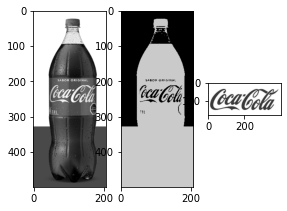

In [507]:
img_aux = img_1_gray.copy()

plt.imshow(template, cmap='gray')
img_aux[img_1_gray > 180] = template_grey_value()
img_aux[img_1_gray < 180] = 170

# img_aux = img_aux[0:300,0:200]

plt.subplot(1,4,1)
plt.imshow(img_1_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(template, cmap='gray')

In [508]:
gaussian_templates = gaussian_pyramid(template, 3)

In [509]:
pyramid = scales_pyramid(img_aux, 1.7, 2.5)

Tamaño original: (500, 207)
Dimensiones generadas:
(850, 352)
(950, 393)
(1050, 435)
(1150, 476)
(1250, 518)


In [510]:
best_image_1 = pyramid[4]

Imagen 2

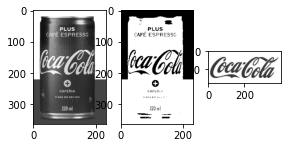

In [511]:
img_aux = img_2_gray.copy()

plt.imshow(template, cmap='gray')
img_aux[img_2_gray > 180] = template_grey_value()
img_aux[img_2_gray < 180] = 230

# img_aux = img_aux[0:300,0:200]

plt.subplot(1,4,1)
plt.imshow(img_2_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(template, cmap='gray')

In [512]:
pyramid = scales_pyramid(img_aux, 1.5, 2.5)

Tamaño original: (363, 233)
Dimensiones generadas:
(544, 350)
(635, 408)
(726, 466)
(817, 524)
(908, 582)


In [513]:
best_image_2 = pyramid[1]

Imagen 3

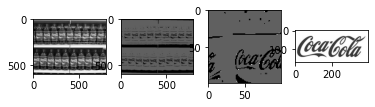

In [514]:
img_aux = img_3_gray.copy()

plt.imshow(template, cmap='gray')
gray = template_grey_value()
img_aux[img_3_gray > 180] = gray
img_aux[img_3_gray < 180] = 150


# img_aux = img_aux[0:300,0:200]

plt.subplot(1,4,1)
plt.imshow(img_3_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(img_aux[100:200,0:100], cmap='gray')

plt.subplot(1,4,4)
plt.imshow(template, cmap='gray')

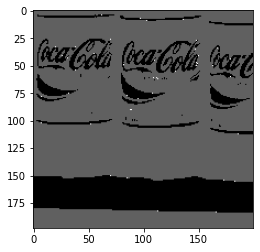

In [515]:
plt.imshow(img_aux[400:,0:200], cmap='gray')

Template shape: (175, 400)
Tamaño original: (598, 799)
Dimensiones generadas:
(1196, 1598)
(1495, 1998)
(1794, 2397)
(2093, 2796)
(2392, 3196)
Indice: 0
Shape: (1196, 1598)
Indice: 1
Shape: (1495, 1998)
Indice: 2
Shape: (1794, 2397)
Indice: 3
Shape: (2093, 2796)
Indice: 4
Shape: (2392, 3196)


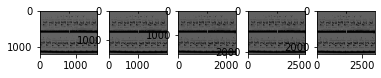

In [516]:
print("Template shape: " + str(template.shape))
pyramid = scales_pyramid(img_aux, 2,4)
size = len(pyramid)
for i,image in enumerate(pyramid):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))


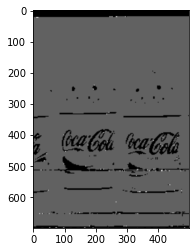

In [517]:
plt.imshow(pyramid[1][0:700,0:500], cmap='gray')

In [518]:
best_image_3 = pyramid[4]

Imagen 4

Template shape: (175, 400)
Tamaño original: (493, 715)
Dimensiones generadas:
(148, 214)
(234, 340)
(320, 465)
(407, 590)
(493, 715)
Indice: 0
Shape: (148, 214)
Indice: 1
Shape: (234, 340)
Indice: 2
Shape: (320, 465)
Indice: 3
Shape: (407, 590)
Indice: 4
Shape: (493, 715)


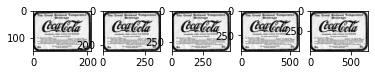

In [519]:
print("Template shape: " + str(template.shape))
pyramid = scales_pyramid(img_4_gray, 0.3,1)
size = len(pyramid)
for i,image in enumerate(pyramid):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))


best_image_4 = pyramid[3]

Imagen 5

Pre procesamiento de color

132


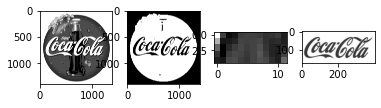

In [520]:
img_aux = img_5_gray.copy()

a = (int) (np.average(template[93:98,55:67].flatten()))
print(a)
plt.imshow(template, cmap='gray')
img_aux[img_5_gray > 254] = a
img_aux[img_5_gray < 254] = 255

plt.subplot(1,4,1)
plt.imshow(img_5_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(template[93:98,55:67], cmap='gray')

plt.subplot(1,4,4)
plt.imshow(template, cmap='gray')

Pre procesamiento de escala

Tamaño original: (1389, 1389)
Dimensiones generadas:
(417, 417)
(486, 486)
(556, 556)
(625, 625)
(694, 694)
Indice: 0
Shape: (417, 417)
Indice: 1
Shape: (486, 486)
Indice: 2
Shape: (556, 556)
Indice: 3
Shape: (625, 625)
Indice: 4
Shape: (694, 694)


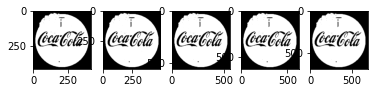

In [521]:
pyramid = scales_pyramid(img_aux, 0.3,0.5)
size = len(pyramid)
for i,image in enumerate(pyramid):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))


best_image_5 = pyramid[1]

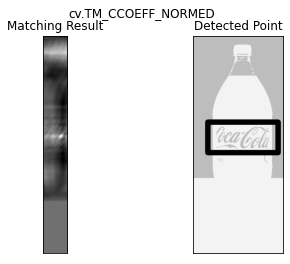

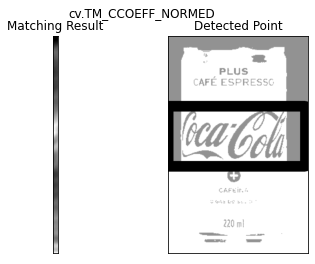

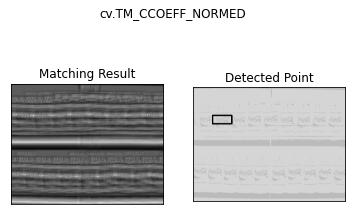

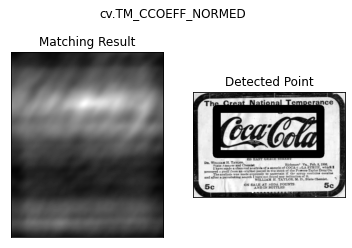

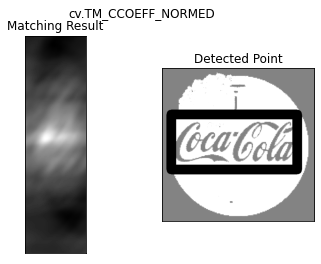

In [522]:
w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
#methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
methods = ['cv.TM_CCOEFF_NORMED']
#images = [img_1_gray, img_2_gray, img_3_gray, img_4_gray, img_5_gray]
images = {
    "best_image_1": best_image_1, 
    "best_image_2": best_image_2, 
    "best_image_3": best_image_3, 
    "best_image_4": best_image_4, 
    "best_image_5": best_image_5
}

for name, img in images.items():
    for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(img, template, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)


        cv.rectangle(img_salida,top_left, bottom_right, 0, 30)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        #plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        file_name = name + '_output.png'
        cv.imwrite(file_name,img_salida)

        plt.suptitle(meth)
        plt.show()

Multiples detecciones

In [526]:
img_gray = best_image_3.copy()
template = template.copy()
output = img_gray.copy()

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
# Fijamos un umbral de "coincidencia"
threshold = 0.50


loc = np.where( res >= threshold)

print(loc)
for pt in zip(*loc[::-1]):
    cv.rectangle(output, pt, (pt[0] + w, pt[1] + h), (0), 2)

#plt.imshow("batmans",cmap='gray')    
cv.imwrite('res.png',output)

(array([ 575,  575,  575,  575,  576,  576,  576,  576,  576,  576,  577,
        577,  577,  577,  577,  577,  578,  578,  578,  578,  578,  578,
        579,  579,  579,  579,  580,  580,  580,  581,  581,  581,  581,
        582,  582,  582,  583,  583,  585,  585,  586,  586,  586,  587,
        587,  587,  592,  592,  592,  593,  593,  593,  593,  593,  593,
        593,  594,  594,  594,  594,  594,  594,  594,  595,  595,  595,
        595,  595,  595,  595,  596,  596,  596,  596,  596,  596,  596,
        597,  597,  597,  597,  597,  597,  597,  598,  598,  598,  598,
        598,  598,  599,  599,  599, 1680, 1680, 1681, 1681, 1681, 1685,
       1685, 1686, 1686, 1686, 1686, 1686, 1687, 1687, 1687, 1687, 1687,
       1688, 1688, 1688, 1688, 1688, 1688, 1689, 1689, 1689, 1689, 1689,
       1690, 1690, 1690, 1690, 1700, 1700, 1700, 1701, 1701, 1701, 1701,
       1702, 1702, 1702, 1703, 1703, 1705, 1705, 1706, 1706, 1711, 1711,
       1711, 1711, 1712, 1712, 1712, 1712, 1712, 1

True